In [1]:
from sympy import *
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r, A, B = symbols('r A B')
V_LJ_AB, V_LJ_se, V_LJ_re, V = symbols('V_LJ_AB V_LJ_se V_LJ_re V', cls=Function)

In [3]:
V_LJ_AB = A/r**12 - B/r**6

In [4]:
V_LJ_AB

A/r**12 - B/r**6

In [5]:
epsilon, sigma, r_min= symbols('epsilon sigma r_min')
V_LJ_se = V_LJ_AB.subs(A,4*epsilon*sigma**12).subs(B,4*epsilon*sigma**6)
simplify(V_LJ_se)

4*epsilon*sigma**6*(-r**6 + sigma**6)/r**12

In [6]:
V_LJ_re = V_LJ_se.subs(sigma,2**(-1/6)*r_min)
simplify(V_LJ_re)

epsilon*r_min**6*(-2.0*r**6 + 1.0*r_min**6)/r**12

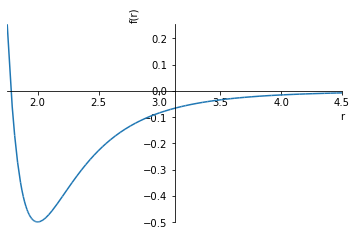

In [7]:
p1 = plot(V_LJ_re.subs(epsilon,0.5).subs(r_min,2), (r,1.75,4.5), show=False)
p1.show()

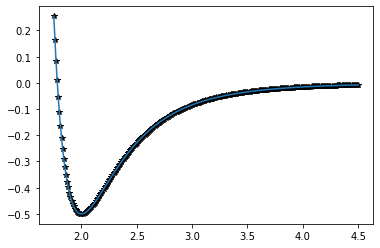

In [8]:
dat = np.loadtxt('rerun-XXX/rerun-XXX.dat', dtype={'names': ('step', 'Epot', 'dist'), 'formats': ('i4', 'f8', 'f8')})
V = V_LJ_re.subs(epsilon,0.5).subs(r_min,2)
Vy = lambdify(r, V)(dat['dist'])
plt.plot(dat['dist'], dat['Epot'], 'k*')
plt.plot(dat['dist'], Vy)
plt.show()